# Notebook to filter, clean, and join raw datafiles
Output clean data to the appropriate folder

## Contents
Add links to sections in the notebook

- [ERCOT wind & load data](#ERCOT-wind-and-load-data)
    - [Export clean data](#Export-clean-ERCOT-data)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## ERCOT wind and load data

Find filenames for all .xls and .xlsx files in the wind generation subfolder

In [7]:
path = 'ERCOT/Hourly wind generation'
full_xls = os.path.join(path, '*.xls')
full_xlsx = os.path.join(path, '*.xlsx')

files = glob.glob(full_xls)
files.extend(glob.glob(full_xlsx))

In [17]:
cols = ['ERCOT Load, MW', 'Total Wind Installed, MW',
       'Total Wind Output, MW', 'Wind Output, % of Installed',
       'Wind Output, % of Load', '1-hr MW change', '1-hr % change']

In [22]:
df = pd.concat([pd.read_excel(fn, sn='numbers', index_col=0) for fn in files])

In [23]:
df.sort_index(inplace=True)

In [24]:
df.head()

,% of Daily Wind Change,% of Daily Wind Change on Hour,1-hr % change,1-hr MW change,Date,"ERCOT Load, MW",Hour,Month,"Total Wind Installed, MW","Total Wind Output, MW",Wind Daily Change on Hour,"Wind Output, % of Installed","Wind Output, % of Load"
2007-01-01 00:00:00,NaN,NaN,NaN,NaN,1,30428.0,0.0,1.0,2790.0,1074.0,NaN,38.494624,3.529644
2007-01-01 01:00:00,NaN,NaN,-14.096834,-151.4,1,30133.0,1.0,1.0,2790.0,922.6,NaN,33.068100,3.061760
2007-01-01 02:00:00,NaN,NaN,-7.955777,-73.4,1,29941.0,2.0,1.0,2790.0,849.2,NaN,30.437276,2.836245
2007-01-01 03:00:00,NaN,NaN,24.387659,207.1,1,29949.0,3.0,1.0,2790.0,1056.3,NaN,37.860215,3.526996
2007-01-01 04:00:00,NaN,NaN,-20.751680,-219.2,1,30248.0,4.0,1.0,2790.0,837.1,NaN,30.003584,2.767456


In [25]:
df = df.loc[:,cols]

In [26]:
df.head()

,"ERCOT Load, MW","Total Wind Installed, MW","Total Wind Output, MW","Wind Output, % of Installed","Wind Output, % of Load",1-hr MW change,1-hr % change
2007-01-01 00:00:00,30428.0,2790.0,1074.0,38.494624,3.529644,NaN,NaN
2007-01-01 01:00:00,30133.0,2790.0,922.6,33.068100,3.061760,-151.4,-14.096834
2007-01-01 02:00:00,29941.0,2790.0,849.2,30.437276,2.836245,-73.4,-7.955777
2007-01-01 03:00:00,29949.0,2790.0,1056.3,37.860215,3.526996,207.1,24.387659
2007-01-01 04:00:00,30248.0,2790.0,837.1,30.003584,2.767456,-219.2,-20.751680


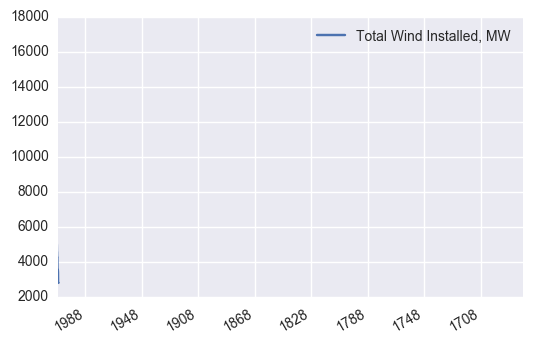

In [27]:
df.plot(y='Total Wind Installed, MW', use_index=True)

Not sure why, but there is one bad row at the end. Removing it in the next cell.

In [28]:
df = df.iloc[:-1,:]

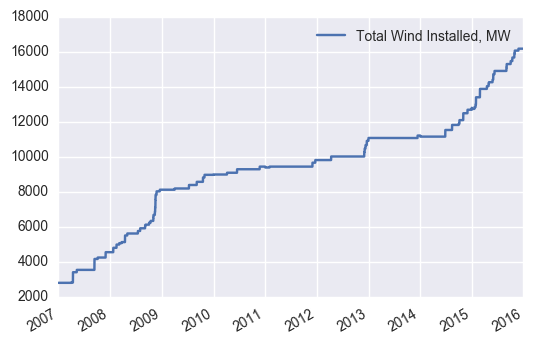

In [29]:
df.plot(y='Total Wind Installed, MW', use_index=True)

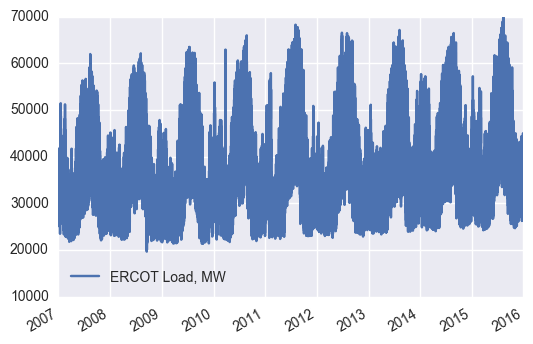

In [34]:
df.plot(y='ERCOT Load, MW', use_index=True)

Looks like there is one datapoint from 2016 at the end of the file. I'm going to remove it.

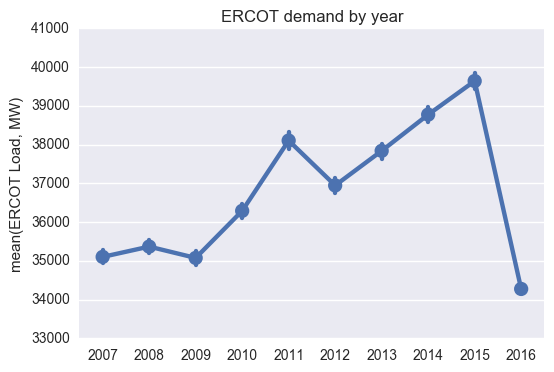

In [39]:
sns.pointplot(df.index.year, df['ERCOT Load, MW'], aspect=1.5)
plt.title('ERCOT demand by year')

In [41]:
df = df.iloc[:-1,:]

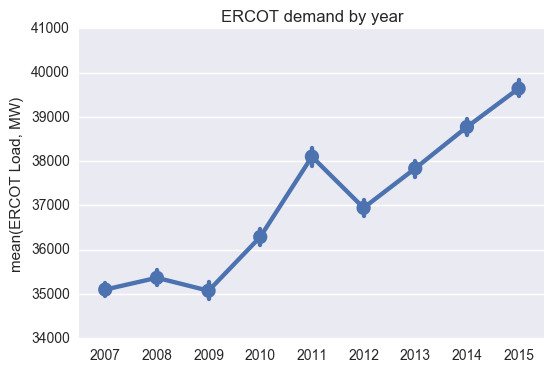

In [42]:
sns.pointplot(df.index.year, df['ERCOT Load, MW'], aspect=1.5)
plt.title('ERCOT demand by year')

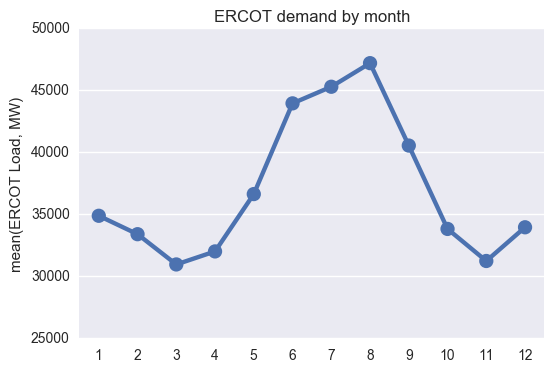

In [40]:
sns.pointplot(df.index.month, df['ERCOT Load, MW'], aspect=1.5)
plt.title('ERCOT demand by month')

### Export clean ERCOT data

In [43]:
filename = 'ERCOT wind data.csv'
path = '../Clean Data'
fullpath = os.path.join(path, filename)

In [45]:
df.to_csv(fullpath)